In [36]:
import pandas as pd
import numpy as np

In [37]:
# 创建一个csv文件,里面有两列数据，一列是A,一列是B,一共有100项目，数据的大小为0-10之间的随实数
df = pd.DataFrame(np.random.uniform(0, 10, size=(100, 2)), columns=list('AB'))

In [38]:
df.head()

,A,B
0,3.741466,2.723670
1,9.155362,7.535938
2,9.012478,6.816738
3,9.542691,0.482512
4,9.016352,7.308670


In [39]:
import math
import random

# 用K-means算法分成两类
# 计算距离
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return clusters

# 更新质心
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroid = [sum(dim) / len(cluster_points) for dim in zip(*cluster_points)]
        centroids.append(centroid)
    return centroids

def k_means(data, k, max_iterations=100):
    # Initialize centroids randomly
    centroids = random.sample(data, k)
    
    for _ in range(max_iterations):
        # Assign data points to the nearest centroid
        clusters = assign_clusters(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        if np.array_equal(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids


In [40]:
# 对于之前生成的数据进行分类
data = df.values

data


array([[3.74146562, 2.72367035],
       [9.15536186, 7.53593829],
       [9.01247833, 6.81673833],
       [9.54269067, 0.48251158],
       [9.016352  , 7.30867013],
       [0.30687235, 1.39117224],
       [0.81894911, 2.44543591],
       [0.81012811, 4.97317004],
       [7.06450423, 2.409552  ],
       [6.16602359, 8.11337473],
       [9.67667718, 3.72558192],
       [7.35448782, 7.69526098],
       [0.30446747, 6.90514512],
       [5.66129998, 6.71486911],
       [0.41815625, 8.07041475],
       [4.73402131, 5.26349118],
       [1.83680335, 0.1614512 ],
       [3.33892343, 9.04485302],
       [7.36857641, 0.73784673],
       [2.78359063, 3.46707508],
       [2.05337155, 0.20985371],
       [9.50324951, 9.89198977],
       [5.80362234, 1.22499519],
       [9.34516131, 3.8994593 ],
       [9.46293513, 8.8227461 ],
       [0.2511704 , 5.22913109],
       [9.08767691, 1.96540464],
       [1.89036904, 6.71837881],
       [7.31794391, 1.12374238],
       [5.81294489, 6.04142899],
       [4.

In [41]:
clusters, centroids = k_means(list(data), k=2)
df['Cluster'] = clusters

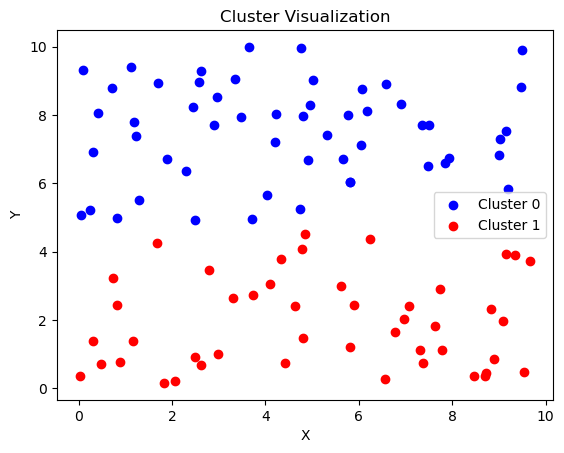

In [43]:
# 可视化结果

import matplotlib.pyplot as plt

cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]

plt.scatter(cluster_0['A'], cluster_0['B'], color='blue', label='Cluster 0')
plt.scatter(cluster_1['A'], cluster_1['B'], color='red', label='Cluster 1')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Visualization')

plt.legend()

plt.show()
